<a href="https://colab.research.google.com/github/FARTASH-421/AI2/blob/master/HW_CV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

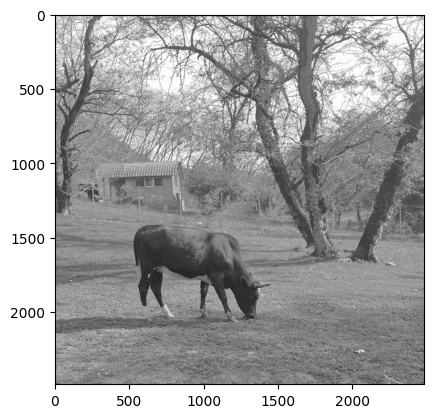

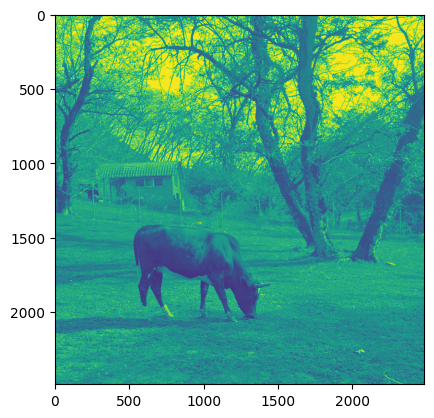

array([[245, 254, 231, ..., 250, 236, 235],
       [243, 242, 250, ..., 243, 249, 251],
       [234, 255, 249, ..., 250, 247, 249],
       ...,
       [128, 102,  70, ..., 133, 135, 133],
       [129, 128, 111, ..., 124, 127, 146],
       [119, 129, 131, ..., 113, 119, 157]], dtype=uint8)

In [ ]:
image = cv2.imread('/content/Sample.jpeg')
plt.imshow(image)
plt.show()

# change image RGB To Grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.show()
arrImg = np.array(gray_img)
arrImg

#Q1_Part A
##understand contrast image



In [ ]:
def draw(df_x, df_y, title_text):
  plt.bar(df_x, df_y)
  plt.xlabel('value', color='r')
  plt.ylabel('count', color='g')
  plt.title(title_text)
  plt.show()

     value  count
0        0    771
1        1    326
2        2    408
3        3    426
4        4    400
..     ...    ...
251    251  59029
252    252  47049
253    253  70211
254    254  40328
255    255  78710

[256 rows x 2 columns]


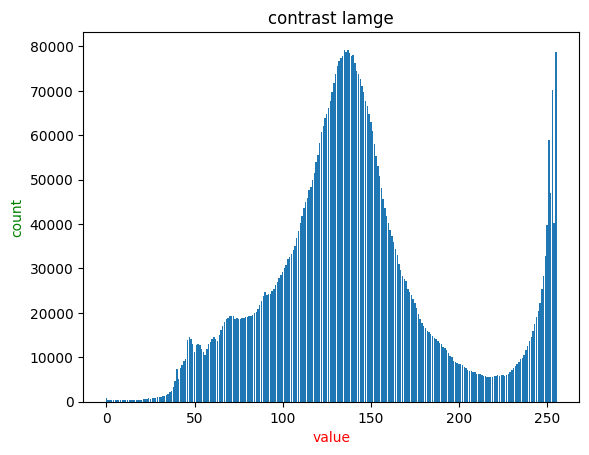

In [ ]:
value , count = np.unique(arrImg, return_counts=True)
df = pd.DataFrame()
df['value'] = value
df['count'] = count
print(df)
draw(df['value'], df['count'],'contrast Iamge')


#Q1_Part B
##Implement a method for histogram sliding

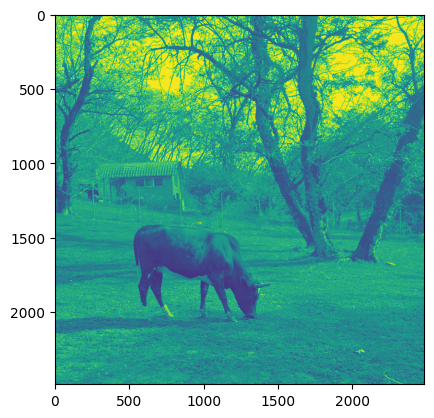

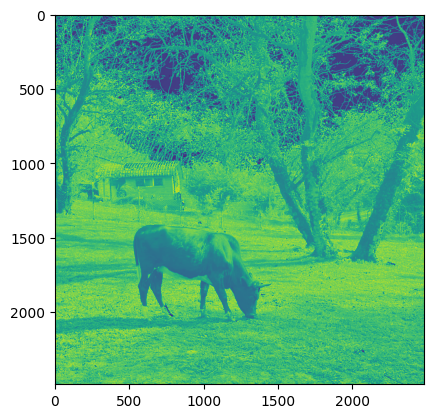

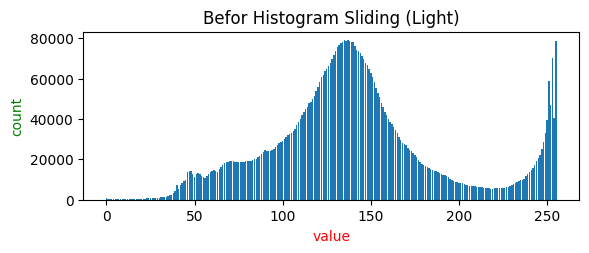

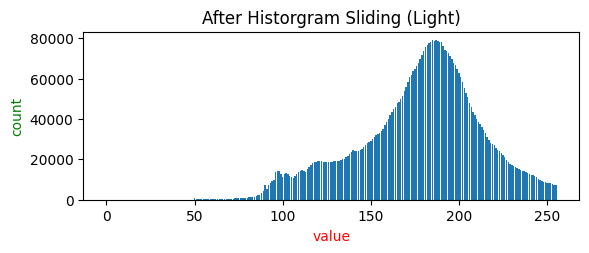

<Figure size 640x480 with 0 Axes>

     value  count
0        0      0
1        1      0
2        2      0
3        3      0
4        4      0
..     ...    ...
251    251   8405
252    252   8213
253    253   7756
254    254   7525
255    255   7241

[256 rows x 2 columns]


In [ ]:
#Implement Histogram	Sliding for Light image

def hist_sliding_light(img, mydata, num_shift):
  copy_data = mydata.copy()
  my_imgLi = img + num_shift
  copy_data['count'] = copy_data['count'].shift(periods = num_shift, fill_value=0)

  return copy_data, my_imgLi

df_imgLight, my_imLi = hist_sliding_light(arrImg, df, 50)

plt.imshow(arrImg)
plt.show()

plt.imshow(my_imLi)
plt.show()

plt.subplot(2, 1, 1)
draw(df['value'], df['count'], 'Befor Histogram Sliding (Light)')
plt.subplot(2,1,2)

draw(df_imgLight['value'], df_imgLight['count'], 'After Historgram Sliding (Light)')

plt.subplots_adjust(hspace=0.6)
plt.show()
print(df_imgLight)







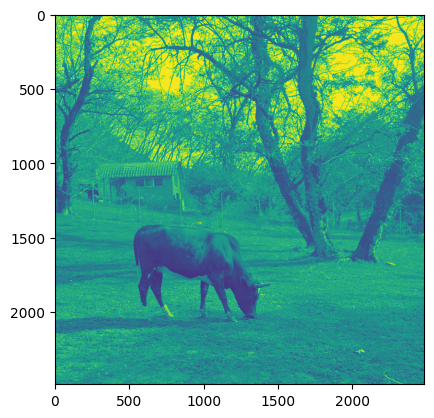

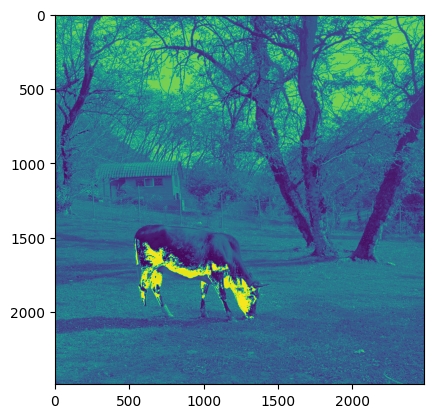

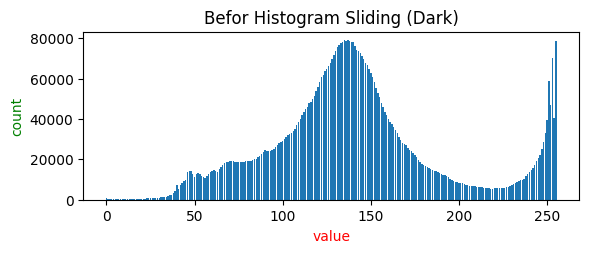

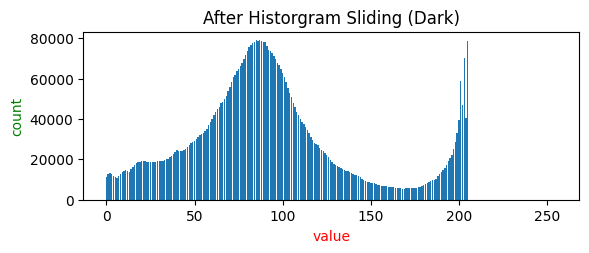

<Figure size 640x480 with 0 Axes>

     value  count
0        0      0
1        1      0
2        2      0
3        3      0
4        4      0
..     ...    ...
251    251   8405
252    252   8213
253    253   7756
254    254   7525
255    255   7241

[256 rows x 2 columns]


In [ ]:
#Implement Histogram	Sliding for Dark image


def hist_sliding_Dark(img, mydata, num_shift):
  copy_dark = mydata.copy()
  myImg = img.copy() - num_shift
  copy_dark = copy_dark[::-1]
  copy_dark['count'] = copy_dark['count'].shift(periods = num_shift, fill_value=0)
  copy_dark = copy_dark[::-1]
  return copy_dark, myImg


df_imgDark, myImg = hist_sliding_Dark(arrImg, df, 50)
df_imgDark.tail(60)
plt.imshow(arrImg)
plt.show()

plt.imshow(myImg)
plt.show()

plt.subplot(2, 1, 1)
draw(df['value'],df['count'], 'Befor Histogram Sliding (Dark)')
plt.subplot(2,1,2)

draw(df_imgDark['value'], df_imgDark['count'], 'After Historgram Sliding (Dark)')

plt.subplots_adjust(hspace=0.6)
plt.show()
print(df_imgLight)

#Q1 part 3
##impliment Histogram Equaliztion

In [ ]:
def My_Histogram_Eq(arrImg):
  value , count = np.unique(arrImg, return_counts=True)
  dfs = pd.DataFrame()
  dfs['value']= value
  dfs['count'] = count
  draw(dfs['value'], dfs['count'],'contrast Iamge')
  # ////////////////////////////////////////////////////////////////////////////

  lis = []
  sum = 0
  for x in dfs['count']:
    lis.append(int(sum + x))
    sum = sum + x

  dfs['sum_element'] = lis

  # ////////////////////////////////////////////////////////////////////////////

  n = dfs['sum_element'][len(dfs['sum_element'])-1]

  lis_divi = []
  for x in dfs['sum_element']:
    lis_divi.append(255 * (x/n) )
  dfs['divi_by_n'] = lis_divi

  # ////////////////////////////////////////////////////////////////////////////

  lis_round = []
  index = 0
  for x in dfs['divi_by_n']:
    lis_round.append(round(x))

  dfs['Round'] = lis_round

  # ////////////////////////////////////////////////////////////////////////////
  my_array = arrImg.copy()
  new_list = []
  for x in my_array:
    new_rowLis = []
    for y in x:
      new_rowLis.append(dfs['Round'][y])
    new_list.append(new_rowLis)

  new_image = np.array(new_list)
  value1 , count1= np.unique(new_image, return_counts=True)

  dss = pd.DataFrame()
  dss['value']= value1
  dss['count'] = count1
  draw(value1, count1, "Histogram By my code")


  # plt.imshow(arrImg)
  # plt.show()
  # plt.imshow(new_image)
  # plt.show()
  # ///////////////////////////////////////////////////////////////
  return new_image, dss



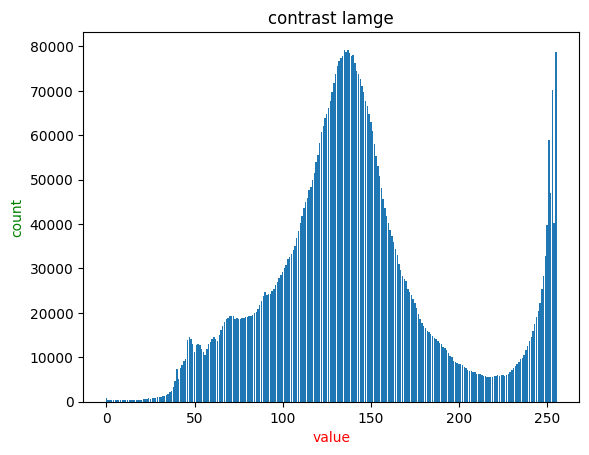

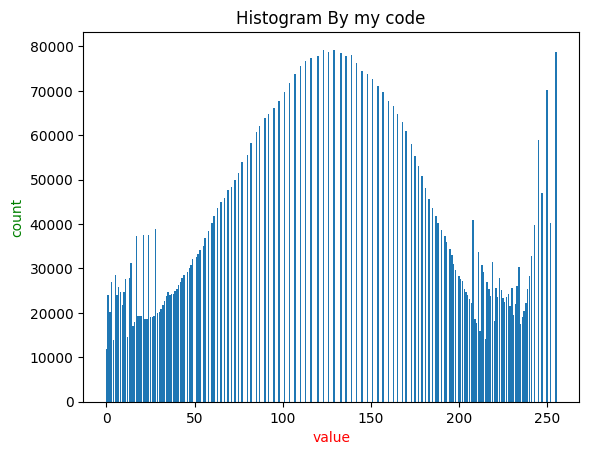

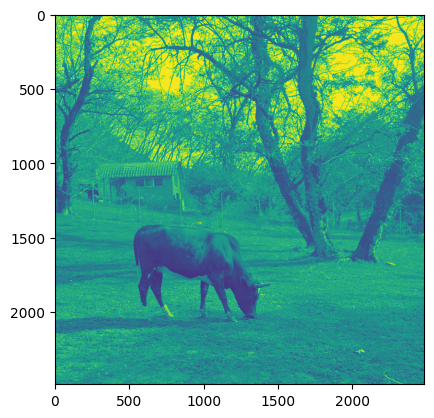

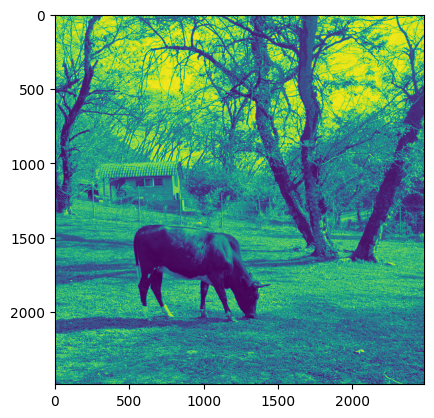

In [ ]:
newIm, dfs = My_Histogram_Eq(arrImg)

plt.imshow(arrImg)
plt.show()


plt.imshow(newIm)
plt.show()


histogarm by OpenCV

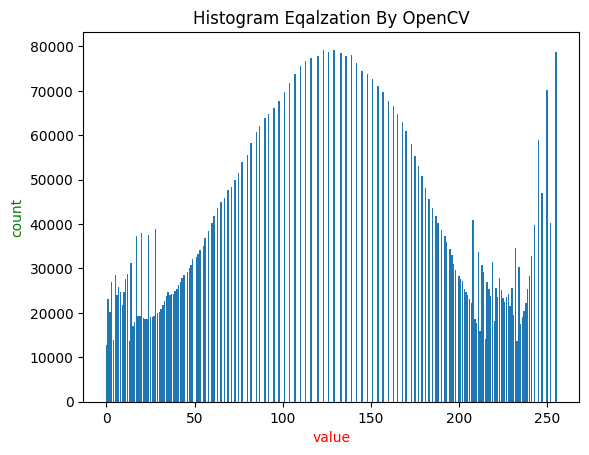

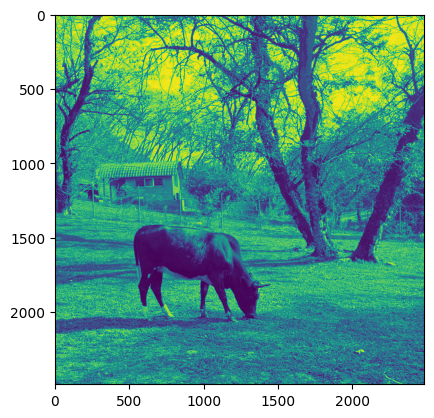

In [ ]:
his_eq = cv2.equalizeHist(arrImg)

value_eq , count_eq = np.unique(his_eq, return_counts=True)

dfs_his = pd.DataFrame()
dfs_his['value']= value_eq
dfs_his['count'] = count_eq


draw(dfs_his['value'], dfs_his['count'], "Histogram Eqalzation By OpenCV")
plt.show()
dfs_his

# plt.imshow(his_eq)
# plt.show()

#Q2
##Find stars in image file

In [ ]:
x = input().split()
w = int(x[0])
h = int(x[1])
star = int(x[2])

def change(value):
    if(value[0] == '('):
        return int(value[1:len(value)-1]), -1
    if value[len(value)-1] == ',':
        return int(value[:len(value)-1]), 0
    if value[len(value)-1] == ')':
        return int(value[:len(value)-1]), 1


270 360 26 (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 1, 4) (7, 11, 14) (1, 5, 8) (5, 9, 12) (26, 30, 33) (41, 45, 48) (35, 39, 42) (8, 12, 15) (35, 39, 42) (40, 44, 47) (18, 22, 25) (0, 1, 4) (0, 3, 6) (0, 4, 7) (0, 1, 4) (5, 9, 12) (0, 2, 5) (4, 12, 15) (63, 71, 74) (157, 162, 165) (75, 80, 83) (0, 1, 4) (8, 12, 13) (0, 1, 2) (2, 6, 7) (0, 1, 0) (0, 1, 0) (4, 4, 4) (0, 0, 0) (0, 0, 0) (45, 45, 43) (102, 102, 100) (15, 15, 15) (7, 7, 7) (0, 0, 0) (0, 0, 0) (2, 2, 2) (5, 5, 5) (2, 2, 2) (0, 0, 0) (1, 1, 1) (3, 3, 3) (0, 0, 0) (0, 0, 0) (0, 0, 0) (3, 3, 3) (1, 1, 1) (0, 0, 0) (8, 10, 9) (0, 1, 0) (0, 1, 0) (0, 1, 0) (5, 7, 6) (0, 1, 0) (1, 3, 2) (0, 1, 0) (0, 2, 1) (0, 2, 1) (0, 1, 0) (0, 1, 0) (0, 1, 0) (0, 2,

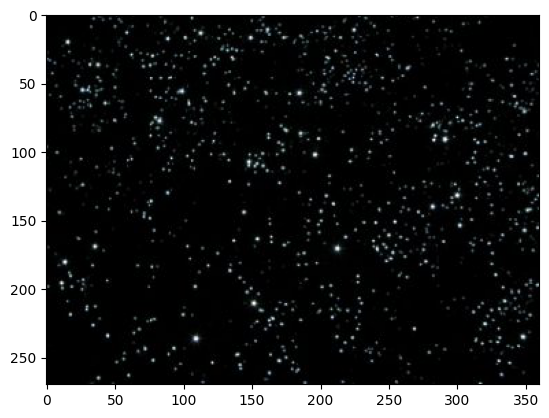

In [ ]:
lis = [x[i] for i in range(3, len(x))]


index = 0
lm = []
my_image = []

for i in range(w):
  li_row = []
  for j in range(h*3):
    y = lis[index]
    index = index +1
    if y != '':
      num, ch = change(y)
      if ch == -1:
          lm.append(num)
      if ch == 0:
        lm.append(num)
      if ch == 1:
         lm.append(num)
         li_row.append(lm)
         lm = []
  my_image.append(li_row)


arr = np.array([my_image[i] for i in range(0, w)])
plt.imshow(arr)
plt.show()

In [ ]:
for i in range(w):
  for j in range(h):
      if np.sum(arr[i][j]) > 690:
        print(i,' ', j)


17   149
20   15
55   26
56   99
57   184
57   185
75   300
90   291
91   283
91   291
93   315
102   196
107   148
132   299
132   300
140   282
144   144
151   254
154   302
169   35
170   212
171   212
171   213
171   241
180   13
180   14
181   13
196   11
210   151
211   151
211   152
226   320
235   348
236   109
237   109
